In [1]:
import pandas as pd
from plotnine import *

In [2]:
def parse_n_chunks(string):
    if len(string) == 1:
        string = f"0{string} chunks" 
        return string
    else:
        string = f"{string} chunks" 
        return string
        

results = pd.read_csv("partial_results.csv", sep=";")
results["n_chunks_retrieved_per_question"] = results["n_chunks_retrieved_per_question"].astype(str).apply(lambda row: parse_n_chunks(row.replace(".0", "")))
results = results.fillna(" Baseline Without RAG").replace("nan chunks"," Baseline Without RAG")
results["embed_model_name"] = results["embed_model_name"].apply(lambda row: (row.replace("sentence-transformers/", "")))

In [3]:
results

,oab_edition_number,llm_name,llm_license,embed_model_name,embed_model_license,n_chunks_retrieved_per_question,score,answers_dict
0,37,GPT 3.5,commercial,paraphrase-multilingual-MiniLM-L12-v2,open-source,05 chunks,58.75,{'1': {'llm_response_text': 'The correct alter...
1,37,GPT 3.5,commercial,paraphrase-multilingual-mpnet-base-v2,open-source,05 chunks,53.75,{'1': {'llm_response_text': 'The correct alter...
2,37,GPT 3.5,commercial,text-embeddings-ada-002,commercial,02 chunks,53.75,{'1': {'llm_response_text': 'The correct alter...
3,37,GPT 3.5,commercial,text-embeddings-ada-002,commercial,05 chunks,58.75,{'1': {'llm_response_text': 'The correct alter...
4,37,GPT 3.5,commercial,text-embeddings-ada-002,commercial,10 chunks,56.25,{'1': {'llm_response_text': 'The correct alter...
5,37,GPT 3.5,commercial,text-embeddings-ada-002,commercial,15 chunks,57.50,{'1': {'llm_response_text': 'The correct alter...
6,37,GPT 3.5,commercial,text-embeddings-ada-002,commercial,20 chunks,53.75,{'1': {'llm_response_text': 'The correct alter...
7,37,GPT 3.5,commercial,Baseline Without RAG,Baseline Without RAG,Baseline Without RAG,58.75,{'1': {'llm_response_text': 'The correct alter...
8,37,GPT 4,commercial,text-embeddings-ada-002,commercial,02 chunks,76.25,{'1': {'llm_response_text': 'D) Há presunção d...
9,37,GPT 4,commercial,text-embeddings-ada-002,commercial,05 chunks,76.25,{'1': {'llm_response_text': 'D) Há presunção d...


In [4]:
results[(results["llm_license"] !=  "open-source") & (results["embed_model_license"] !=  "open-source")]

,oab_edition_number,llm_name,llm_license,embed_model_name,embed_model_license,n_chunks_retrieved_per_question,score,answers_dict
2,37,GPT 3.5,commercial,text-embeddings-ada-002,commercial,02 chunks,53.75,{'1': {'llm_response_text': 'The correct alter...
3,37,GPT 3.5,commercial,text-embeddings-ada-002,commercial,05 chunks,58.75,{'1': {'llm_response_text': 'The correct alter...
4,37,GPT 3.5,commercial,text-embeddings-ada-002,commercial,10 chunks,56.25,{'1': {'llm_response_text': 'The correct alter...
5,37,GPT 3.5,commercial,text-embeddings-ada-002,commercial,15 chunks,57.50,{'1': {'llm_response_text': 'The correct alter...
6,37,GPT 3.5,commercial,text-embeddings-ada-002,commercial,20 chunks,53.75,{'1': {'llm_response_text': 'The correct alter...
7,37,GPT 3.5,commercial,Baseline Without RAG,Baseline Without RAG,Baseline Without RAG,58.75,{'1': {'llm_response_text': 'The correct alter...
8,37,GPT 4,commercial,text-embeddings-ada-002,commercial,02 chunks,76.25,{'1': {'llm_response_text': 'D) Há presunção d...
9,37,GPT 4,commercial,text-embeddings-ada-002,commercial,05 chunks,76.25,{'1': {'llm_response_text': 'D) Há presunção d...
10,37,GPT 4,commercial,text-embeddings-ada-002,commercial,10 chunks,78.75,{'1': {'llm_response_text': 'D) Há presunção d...
11,37,GPT 4,commercial,text-embeddings-ada-002,commercial,15 chunks,78.75,{'1': {'llm_response_text': 'D) Há presunção d...


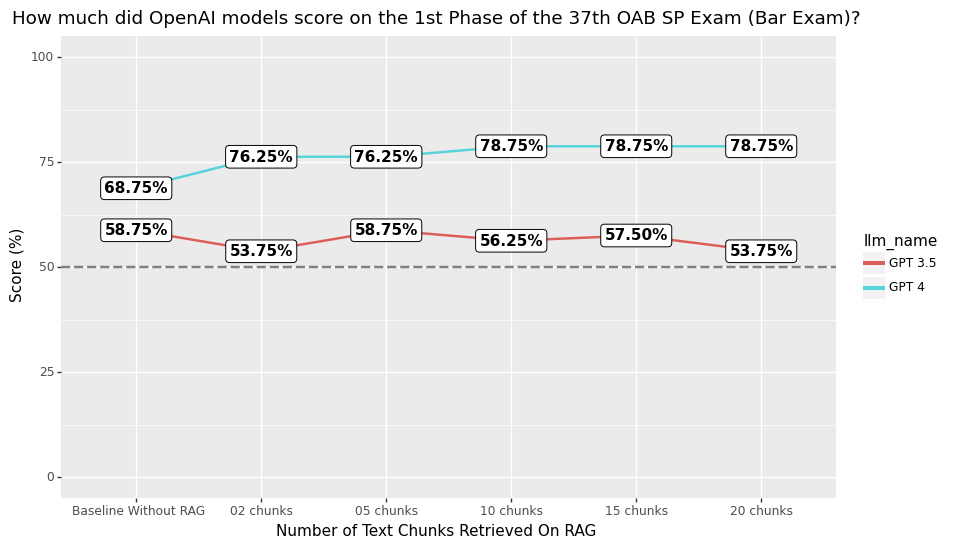

<ggplot: (8792385423565)>

/home/mateusnobre/.local/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 10 x 6 in image.
/home/mateusnobre/.local/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: how_much_did_openai_models_score_on_the_1st_phase_of_the_37th_oab_sp_exam_(bar_exam)?.png


In [7]:
plot_title = "How much did OpenAI models score on the 1st Phase of the 37th OAB SP Exam (Bar Exam)?"
p = (
    ggplot(
        results[(results["llm_license"] !=  "open-source") & (results["embed_model_license"] !=  "open-source")],
        aes(x="n_chunks_retrieved_per_question", y="score", group="llm_name", fill="llm_name", color="llm_name")
    )+
    geom_line(size=1)+
    # facet_grid(".~llm_name")+
    ggtitle(plot_title)+
    xlab("Number of Text Chunks Retrieved On RAG")+
    ylab("Score (%)")+
    theme(figure_size=(10,6))+
    geom_hline(yintercept=50,color="grey",size=1, linetype="dashed")+
    geom_label(
            aes(label="score"),
            # position=position_dodge(width=0.9),
            color="black",
            fill="white",
            size=11,
            fontweight="bold",
            format_string="{:.2f}%",
        )+
    ylim(0,100)
)
display(p)
p.save(f"{plot_title.lower().replace(' ', '_')}.png")

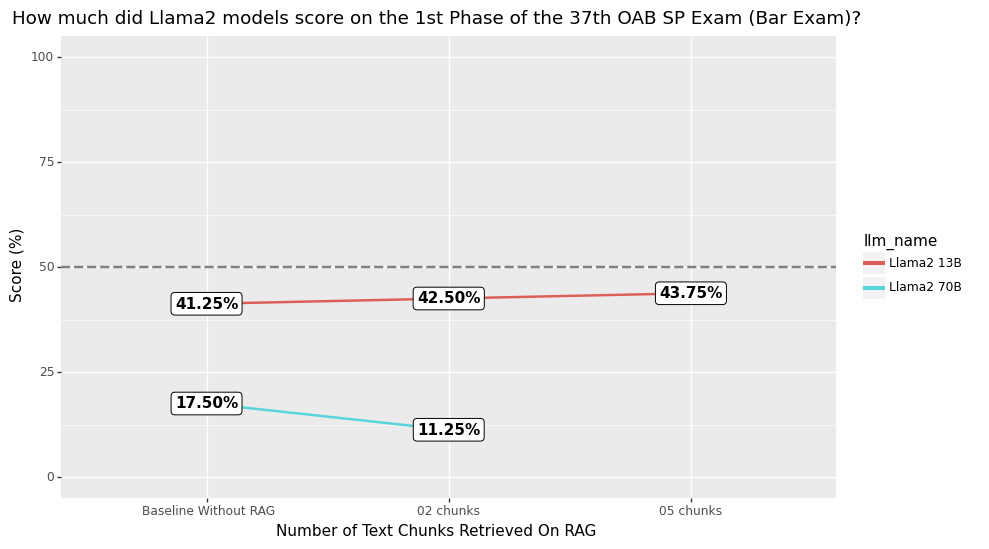

<ggplot: (8792385094614)>

/home/mateusnobre/.local/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 10 x 6 in image.
/home/mateusnobre/.local/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: how_much_did_llama2_models_score_on_the_1st_phase_of_the_37th_oab_sp_exam_(bar_exam)?.png


In [8]:
plot_title = "How much did Llama2 models score on the 1st Phase of the 37th OAB SP Exam (Bar Exam)?"
p = (
    ggplot(
        results[(results["llm_license"] !=  "commercial") & (results["embed_model_license"] !=  "open-source")],
        aes(x="n_chunks_retrieved_per_question", y="score", group="llm_name", fill="llm_name", color="llm_name")
    )+
    geom_line(size=1)+
    # facet_grid(".~llm_name")+
    ggtitle(plot_title)+
    xlab("Number of Text Chunks Retrieved On RAG")+
    ylab("Score (%)")+
    theme(figure_size=(10,6))+
    geom_hline(yintercept=50,color="grey",size=1, linetype="dashed")+
    geom_label(
            aes(label="score"),
            # position=position_dodge(width=0.9),
            color="black",
            fill="white",
            size=11,
            fontweight="bold",
            format_string="{:.2f}%",
        )+
    ylim(0,100)
)
display(p)
p.save(f"{plot_title.lower().replace(' ', '_')}.png")

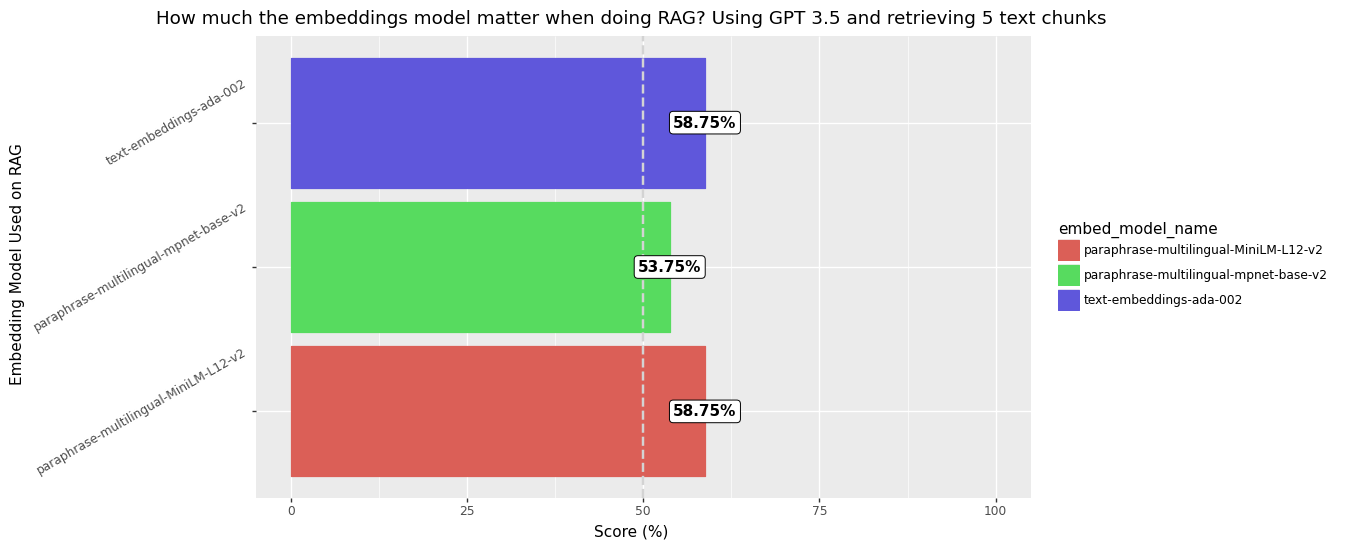

<ggplot: (8792385123076)>

/home/mateusnobre/.local/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 10 x 6 in image.
/home/mateusnobre/.local/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: how_much_the_embeddings_model_matter_when_doing_rag?_using_gpt_3.5_and_retrieving_5_text_chunks.png


In [9]:
plot_title = "How much the embeddings model matter when doing RAG? Using GPT 3.5 and retrieving 5 text chunks"
p = (
    ggplot(
        results[(results["llm_name"] ==  "GPT 3.5") & (results["n_chunks_retrieved_per_question"] ==  "05 chunks") ],
        aes(x="embed_model_name", y="score", group="embed_model_name", fill="embed_model_name", color="embed_model_name")
    )+
    geom_col()+
    # facet_grid(".~llm_name")+
    ggtitle(plot_title)+
    xlab("Embedding Model Used on RAG")+
    ylab("Score (%)")+
    theme(figure_size=(10,6))+
    geom_hline(yintercept=50,color="lightgrey",size=1, linetype="dashed")+
    geom_label(
            aes(label="score"),
            # position=position_dodge(width=0.9),
            color="black",
            fill="white",
            size=11,
            fontweight="bold",
            format_string="{:.2f}%",
        )+
    ylim(0,100)+
    coord_flip()+
     theme(axis_text_y=element_text(rotation=30, hjust=1))
)
display(p)
p.save(f"{plot_title.lower().replace(' ', '_')}.png")